In [2]:
from utils.constants.constants import Constants
import glob
import pandas as pd
import matplotlib.pyplot as plt

# root_dir = '/Users/y1u0d2/desktop/Lab/result/lammps/structure-optimization/10'
# structures = Constants.structures()

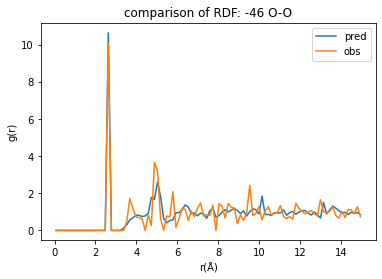

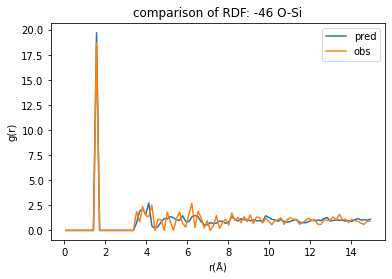

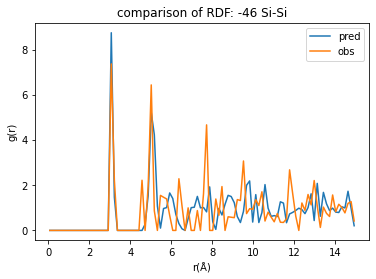

In [6]:
# plot rdf comparison
def get_stable_structure_csv(structure):
    files = glob.glob(f'/Users/y1u0d2/desktop/Lab/data/stable-structure/rdf_csv/*')
    file = list(filter(lambda file: structure in file, files))
    if len(file) != 1:
        return
    return file[0]

def plot_rdf_comparison(df_obs, df_pred, structure, idx, bond_num, bond, save_dir=None):
    fig, ax = plt.subplots()
    ax.set_title(f'comparison of RDF: {structure}-{idx} {bond}')
    ax.set_xlabel('r(Å)')
    ax.set_ylabel('g(r)')
    ax.plot(df_pred.distance, df_pred[bond_num], label='pred')
    ax.plot(df_obs.distance, df_obs[bond], label='obs')
    ax.legend()
    if save_dir is not None:
        fig.savefig(f'{save_dir}/{structure}_{bond}.png')

structures = Constants.structures()
stable_structure = 'beta-trydymite'
if stable_structure in structures:
    stable_structure_path = get_stable_structure_csv(stable_structure)
    df_obs = pd.read_csv(stable_structure_path)
else:
    raise Exception('invalid structure')

pred_dir= '/Users/y1u0d2/desktop/Lab/result/lammps/structure-optimization/04/hex-trydymite/data_hex-trydymite_46.xsf'
df_pred = pd.read_csv(f'{pred_dir}/rdf.csv')

idx = pred_dir.split('/')[-1].split('_')[-1].split('.')[0]
structure = ''

plot_rdf_comparison(df_obs, df_pred, structure, idx, '8-8', 'O-O', pred_dir)
plot_rdf_comparison(df_obs, df_pred, structure, idx, '8-14', 'O-Si', pred_dir)
plot_rdf_comparison(df_obs, df_pred, structure, idx, '14-14', 'Si-Si', pred_dir)
# for structure in structures:
#     obs_dir = get_stable_structure_csv(structure)
#     dirs = glob.glob(f'{root_dir}/{structure}/*')
#     for pred_dir in dirs:
#         idx = pred_dir.split('/')[-1].split('_')[-1].split('.')[0]
#         df_pred = pd.read_csv(f'{pred_dir}/rdf.csv')
#         df_obs = pd.read_csv(obs_dir)
#         plot_rdf_comparison(df_obs, df_pred, structure, idx, '8-8', 'O-O', pred_dir)
#         plot_rdf_comparison(df_obs, df_pred, structure, idx, '8-14', 'O-Si', pred_dir)
#         plot_rdf_comparison(df_obs, df_pred, structure, idx, '14-14', 'Si-Si', pred_dir)